In [1]:
#imported all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load the dataset
data = sns.load_dataset("iris")

In [3]:
#here, we have replaced the category i.e. 'setosa' 'versicolor','virginica' with 0,1,2 respectively
data['species'].replace({'setosa':0,'versicolor':1,'virginica':2},inplace=True)

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
data.shape

(150, 5)

In [6]:
#Basically X represents our inputs i.e. sepal_length & sepal_width and y represents the output i.e. cateogry 
X=data.iloc[:,0:2].values

In [7]:
X.shape

(150, 2)

In [8]:
y=data.iloc[:,-1].values

In [9]:
y.shape

(150,)

# Training the X and y

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [12]:
X_train.shape

(120, 2)

In [13]:
X_test.shape

(30, 2)

In [14]:
np.sqrt(X_train.shape[0])

10.954451150103322

In [15]:
#we know that k=sqrt(No. of data in training set)
#So,here we have used k as 11 because in previous we have calculated the square root of the number of data in training set
# We also converted the 10.954451150103322 to integer 11 because K must be always an integer
k=11

In [16]:
#StandardScaler will transform data such that its distribution will have a mean value 0 and standard deviation of 1.
from sklearn.preprocessing import StandardScaler

In [17]:
sc=StandardScaler()

In [18]:
X_train=sc.fit_transform(X_train)

In [19]:
X_train.shape

(120, 2)

In [20]:
X_test=sc.transform(X_test)

In [21]:
X_test.shape

(30, 2)

# Applying KNN algorithm

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn=KNeighborsClassifier(n_neighbors=k)

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [25]:
y_pred=knn.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_pred)

0.8666666666666667

In [28]:
#Now we have determined the value of K in one method
#The another method is try and error method, where we will notice in which point the accuracy score will be maximum
#So, we create a range of 1 to 21 to see that where the accuracy score will be maximum
accuracy=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [29]:
accuracy

[0.7333333333333333,
 0.7,
 0.7,
 0.7333333333333333,
 0.7666666666666667,
 0.7333333333333333,
 0.7666666666666667,
 0.8333333333333334,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8333333333333334,
 0.8,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8,
 0.8333333333333334]

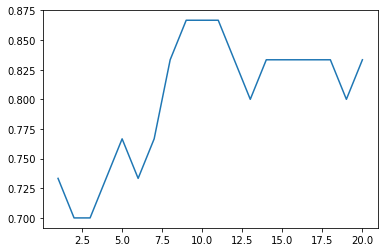

In [30]:
plt.plot(range(1,21),accuracy)

In [31]:
k1=12

In [32]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

In [33]:
y_pred=knn.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred)

0.8333333333333334

In [35]:
def predict_output():
    length=input("ENTER THE LENGTH: ")
    width=input("ENTER THE WIDTH: ")
    x=np.array([[length],[width]]).reshape(1,2)
    x=sc.fit_transform(x)
    if(knn.predict(x)[0]==0):
        print("SETOSA")
    if(knn.predict(x)[0]==1):
        print("Versicolour")
    if(knn.predict(x)[0]==2):
        print("Virginica")

In [36]:
predict_output()

ENTER THE LENGTH: 5
ENTER THE WIDTH: 3
Versicolour


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype <U1 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype <U1 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [37]:
predict_output()

ENTER THE LENGTH: 4
ENTER THE WIDTH: 4
Versicolour


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype <U1 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype <U1 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [38]:
data['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [39]:
predict_output()

ENTER THE LENGTH: 6
ENTER THE WIDTH: 3
Versicolour


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype <U1 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype <U1 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Classifying every point on meshgrid

In [40]:
a=np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)

In [41]:
a.shape

(637,)

In [42]:
b=np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)

In [43]:
b.shape

(768,)

In [44]:
#meshgrid_function: is used to create a rectangular grid out of two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing
XX,YY=np.meshgrid(a,b)

In [45]:
XX.shape

(768, 637)

In [46]:
YY.shape

(768, 637)

In [47]:
#ravel_function: returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)
input_array=np.array([XX.ravel(),YY.ravel()]).T

In [48]:
input_array.shape

(489216, 2)

In [49]:
labels=knn.predict(input_array)

In [50]:
labels.shape

(489216,)

In [51]:
x=labels.reshape(XX.shape)

In [52]:
x.shape

(768, 637)

# Plotting the array as an image

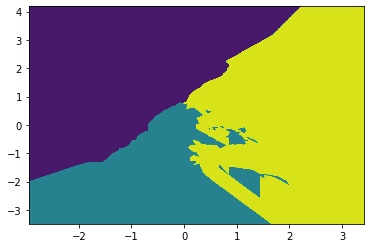

In [54]:
plt.contourf(XX,YY,x)

# Plotting all the training data on the plot

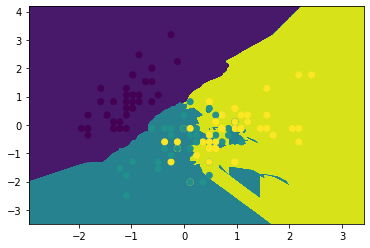

In [56]:
plt.contourf(XX,YY,x)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,label=y_train)